Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Loading the dataset

In [2]:
dataset = pd.read_csv('../Datasets/loan_data.csv')

Analyzing the dataset

In [3]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
dataset.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
dataset.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

<AxesSubplot:>

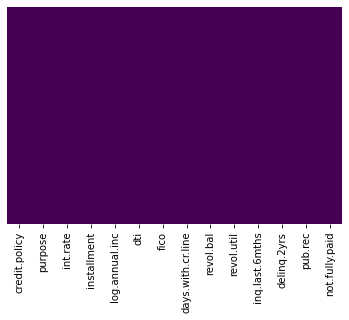

In [6]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

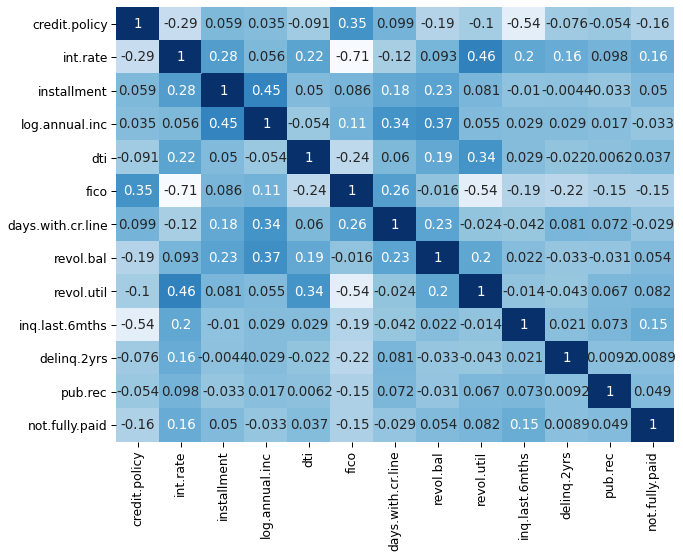

In [7]:
plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale=1.4)

dataset_correlation = dataset.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(dataset_correlation, annot=True,cbar=False,cmap='Blues')

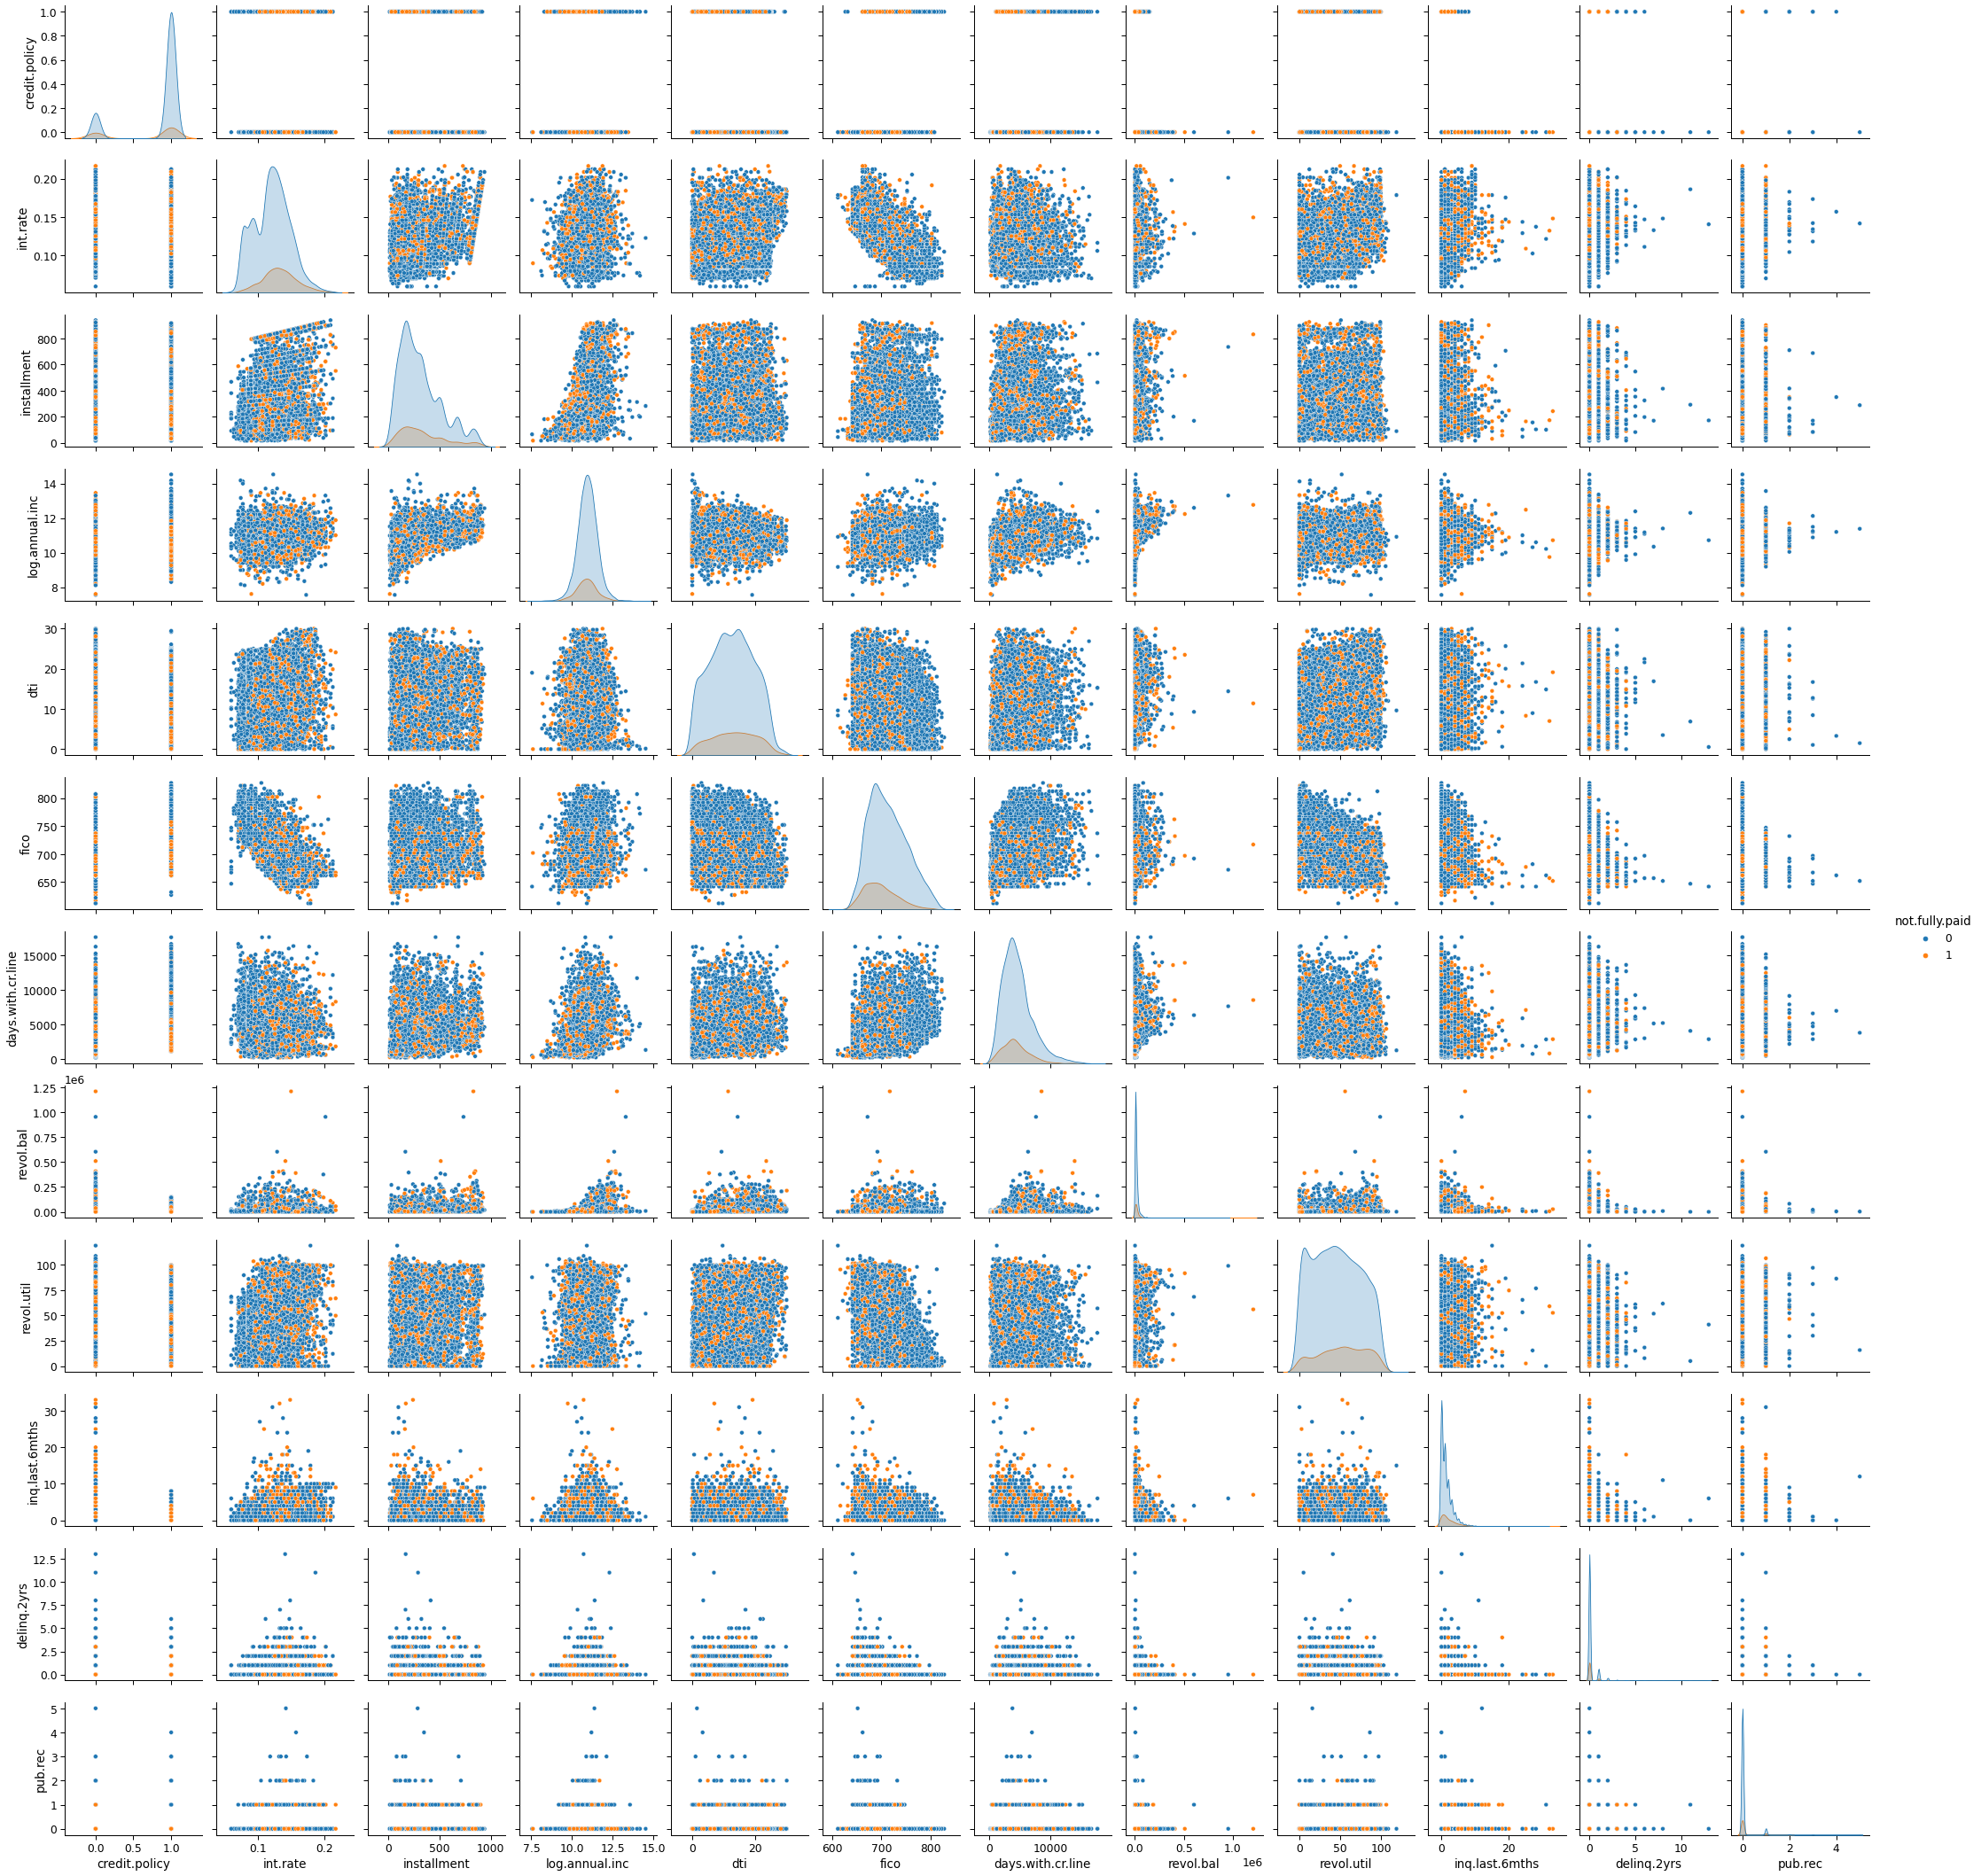

In [8]:
sns.pairplot(dataset,hue='not.fully.paid')

Storing the required column values in variable in X and y for train test split

In [9]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y = dataset.iloc[:, 13].values

In [10]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
# onehotencoder = OneHotEncoder(categorical_features = [0])
# X = onehotencoder.fit_transform(X).toarray()
X

array([[1, 2, 0.1189, ..., 0, 0, 0],
       [1, 1, 0.1071, ..., 0, 0, 0],
       [1, 2, 0.1357, ..., 1, 0, 0],
       ...,
       [0, 2, 0.1071, ..., 8, 0, 0],
       [0, 4, 0.16, ..., 5, 0, 0],
       [0, 2, 0.1392, ..., 6, 0, 0]], dtype=object)

Spliting the data for training and testing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(7183, 13)
(7183,)
(2395, 13)
(2395,)


 Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting Random Forest Classification to the Training set

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)

Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1982,   32],
       [ 363,   18]], dtype=int64)

Ploting confusing matrix

<AxesSubplot:>

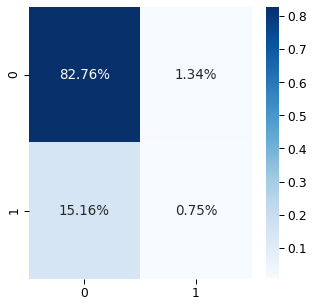

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylim([0,2])

sns.set_context('paper', font_scale=1.4)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

Scoring the classifier

In [18]:
result = classifier.score(X_test, y_test)
print(result)

0.8350730688935282


Classification Report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2014
           1       0.36      0.05      0.08       381

    accuracy                           0.84      2395
   macro avg       0.60      0.52      0.50      2395
weighted avg       0.77      0.84      0.78      2395



Finding the best value for maximum depth for our trees we are going to use for classifier

In [20]:
error_rate = []
for i in range(1,40):
 classifier = RandomForestClassifier(n_estimators = 27,max_depth=i,criterion = 'entropy', random_state = 0)
 classifier.fit(X_train,y_train)
 pred_i = classifier.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.1582463465553236 at max_depth value = 8


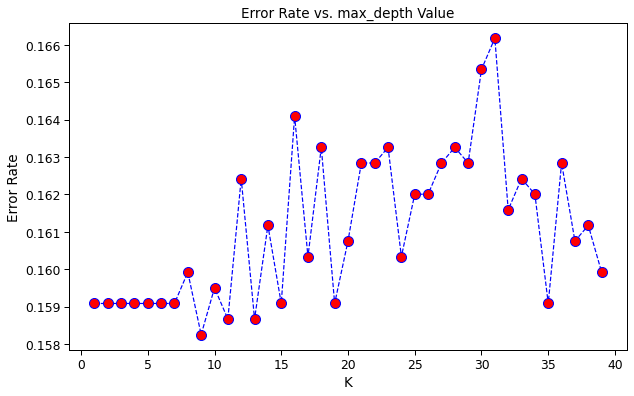

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max_depth Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at max_depth value =",error_rate.index(min(error_rate)))

Finding the best value for number of trees we are going to use for classifier

In [22]:
error_rate = []
for i in range(1,40):
 classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
 classifier.fit(X_train,y_train)
 pred_i = classifier.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.15741127348643005 at n_estimators value = 27


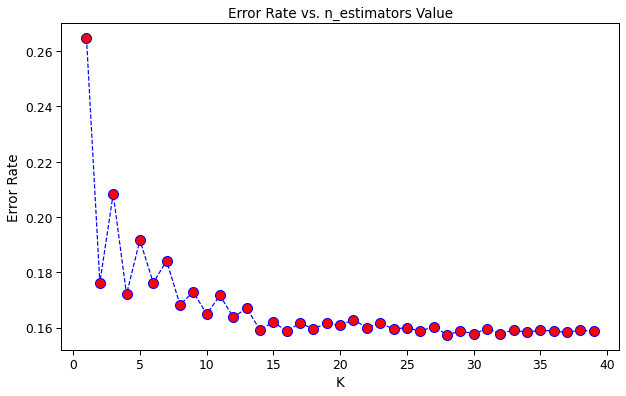

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at n_estimators value =",error_rate.index(min(error_rate)))

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 27, max_depth=8,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=27,
                       random_state=0)

In [25]:
result = classifier.score(X_test, y_test)
print(result)

0.8400835073068893
